In [1]:
import numpy as np
import yfinance as yf
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import random

In [3]:
tickers = ["AAPL", "MSFT", "AMZN", "GOOGL", "TSLA", "NVDA", "JPM", "JNJ", 
           "V", "UNH", "HD", "PG", "MA", "DIS", "PFE", "VZ", "KO", "NFLX", 
           "XOM", "CSCO", "BA", "INTC", "MRK", "NKE", "T", "WMT", "BAC", 
           "CVX", "ABT", "ADBE", "ORCL", "CMCSA", "CRM", "IBM", "PYPL", 
           "AVGO", "MCD", "HON", "SBUX", "MMM", "BMY", "AMD", "GE", "C", 
           "QCOM", "TXN", "LMT", "TMO", "CAR"]

def calculate_annual_risk(ticker):
    data = yf.download(ticker, start="2020-01-01", end="2023-01-01", auto_adjust=True)
    data['Daily Return'] = data['Close'].pct_change()
    daily_volatility = data['Daily Return'].std()
    annual_risk = daily_volatility * np.sqrt(252)
    return annual_risk

risks = [(ticker, calculate_annual_risk(ticker)) for ticker in tickers]
sorted_tickers_by_risk = [ticker for ticker, _ in sorted(risks, key=lambda x: x[1], reverse=True)]

def select_top_risk_stocks(sorted_tickers, num_stocks):
    return sorted_tickers[:num_stocks]  

def calculate_portfolio_return_risk(tickers, start_date='2020-01-01', end_date='2023-01-01'):
    data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)
    returns = data['Close'].pct_change().dropna()
    cov_matrix = returns.cov()
    covar = cov_matrix.values * 252

    returns_mean = returns.mean() * 252
    num_stocks = len(tickers)
    weights = np.ones(num_stocks) / num_stocks

    portfolio_return = np.dot(weights, returns_mean)
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(covar, weights)))

    return portfolio_return, portfolio_risk

def calculate_risk_for_various_num_stocks(sorted_tickers, max_stocks=50):
    risks = []
    num_stocks_range = range(1, max_stocks + 1)
    
    for num_stocks in num_stocks_range:
        selected_stocks = select_top_risk_stocks(sorted_tickers, num_stocks)
        _, portfolio_risk = calculate_portfolio_return_risk(selected_stocks)
        risks.append(portfolio_risk)
    
    return num_stocks_range, risks


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  9 of 9 completed
[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  11 of 11 completed
[*********************100%***********************]  12 of 12 completed
[*********************100%***********************]  13 of 13 completed
[*********************100%***********************]  14 of 14 completed
[*********************10

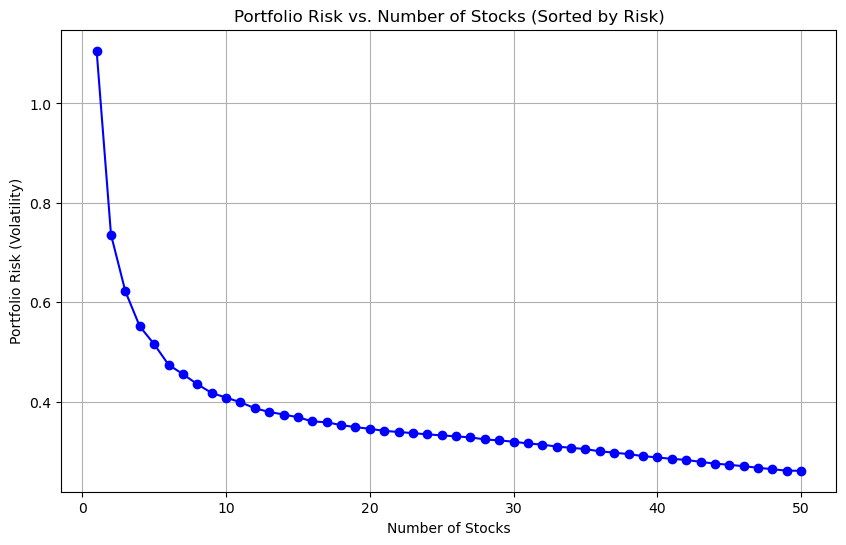

In [4]:
num_stocks_range, risks = calculate_risk_for_various_num_stocks(sorted_tickers_by_risk, max_stocks=50)

plt.figure(figsize=(10, 6))
plt.plot(num_stocks_range, risks, marker='o', linestyle='-', color='b')
plt.title('Portfolio Risk vs. Number of Stocks (Sorted by Risk)')
plt.xlabel('Number of Stocks')
plt.ylabel('Portfolio Risk (Volatility)')
plt.grid(True)
plt.show()